## Assignment 1: Linear Regression

This notebooks presents examples for reference, plus the exercises that are part of first week, which should be submitted as instructed in the assignments [page](https://daniel-yukimura.github.io/assingments-image-processing-lab/).<br>

We'll practice how to fit linear models into data using numpy and a few other helping libraries.<br>

### Example 1: Population $\times$ Profit

Our first data example consists on data about the profit of some big franchise paired with the population size in each city. We want to use a linear model to predict how much profit we would make depending on the size of the city.<br>

Let's use pandas library to give a look at data set.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os

In [3]:
datapath = os.path.join(os.getcwd(), 'data')
data = pd.read_csv(os.path.join(datapath, 'profit.txt'), header=None, names=['Population', 'Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


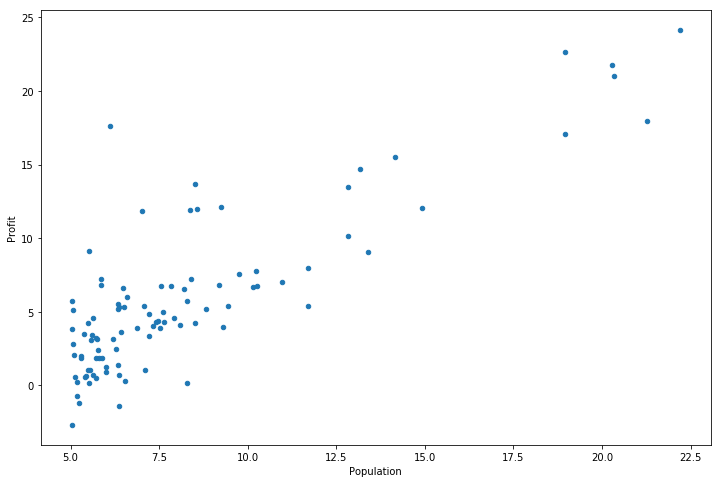

In [5]:
data.plot(kind='scatter', x='Population', y='Profit', figsize=(12,8))

Let's fit a simple linear model of the form
$$\hat{y}(x\mid w,b) = w x + b$$
using **empirical risk minimization**.<br>
We add the *fake bias* column of ones so we can write it in matrix form

In [6]:
data.insert(0, 'Ones', 1)
X = np.matrix(data.iloc[:,0:2].values)
y = np.matrix(data.iloc[:,2:3].values)
theta = np.matrix(np.array([0,0])) #initial value

Scikit-learn linear regression algorithm computes (apart from numerical details) the ordinary least squares solution.

In [7]:
x_sample = np.linspace(data.Population.min(), data.Population.max(), 100)
X_sample = np.c_[np.ones(100), x_sample]

In [8]:
from sklearn import linear_model

/Users/hallpaz/Workspace/deep_env/lib/python3.7/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


Text(0.5,1,'Predicted Profit vs. Population Size')

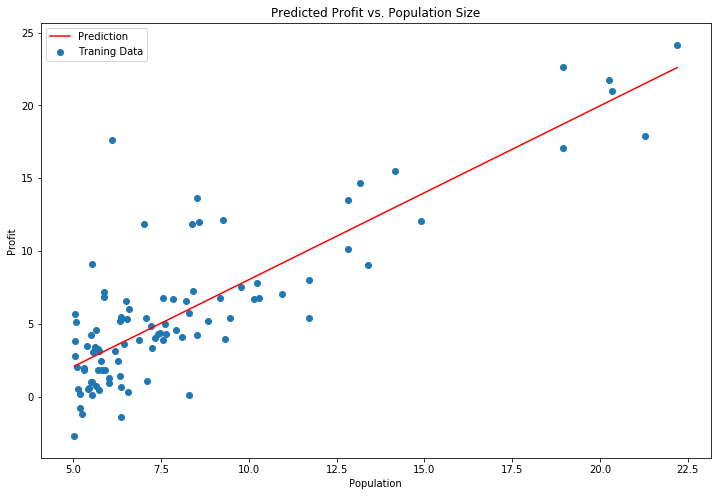

In [9]:
model = linear_model.LinearRegression()
model.fit(X, y)

y_pred = model.predict(X_sample).flatten()

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x_sample, y_pred, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

We can also fit the data using a gradient based method to minimize the empirical risk

In [10]:
def empRisk(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / len(X)

In [11]:
empRisk(X,y,theta)

64.14546775491135

In [12]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost[i] = empRisk(X, y, theta)
        
    return theta, cost

In [13]:
alpha = 0.01
iters = 1000
g, cost = gradientDescent(X, y, theta, alpha, iters)
g

matrix([[-3.24140214,  1.1272942 ]])

In [14]:
empRisk(X,y,g)

9.031911006157824

How this compares with the least squares solution?

In [15]:
empRisk(X,y, np.matrix(np.array([model.intercept_[0], model.coef_[0,1]]))) 
#model coefficients have a strange format

8.953942751950354

Text(0.5,1,'Predicted Profit vs. Population Size')

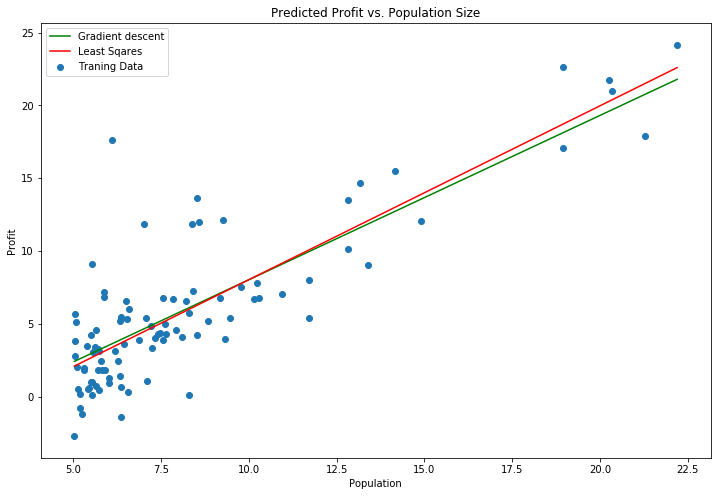

In [16]:
y_gd = g[0, 0] + (g[0, 1] * x_sample)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x_sample, y_gd, 'g', label='Gradient descent')
ax.plot(x_sample, y_pred, 'r', label='Least Sqares')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

Since the gradient descent function also returns a vector with the evolution of empirical risk during training, we can observe how it decreases with the number of iterations.

Text(0.5,1,'Error vs. Training Epoch')

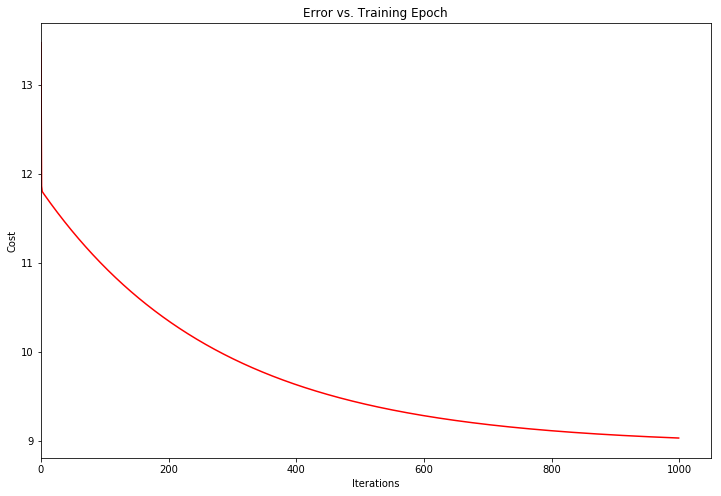

In [17]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlim(xmin=0)
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

The problem we are dealing is convex, therefore is expected that gradient descent converge.
***

### Exercise 1: Explicit solution for simple linear regression
In this case, both input and output are scalars, i.e. of dimension 1. 
* Show that the solution for the **Empirical Risk Minimization** strategy (see [slides](https://daniel-yukimura.github.io/schedules-image-processing-lab/slides/class_1_Machine-Learning.pdf)) in this case is given by the following equations:

$$\hat{w}_n = \frac{\sum_{i=1}^n(x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n(x_i - \bar{x})^2} \hspace{.75cm}\left(\approx \frac{cov[X,Y]}{var[X]}\right)$$

$$\hat{b}_n = \bar{y}-\hat{w}_n \bar{x} \hspace{.75cm} \left(\approx \mathbb{E}[Y] - \hat{w}_n\mathbb{E}[X]\right)$$

where $\bar{v} = \frac{1}{n} \sum_{i=1}^nv_i$ is the mean value of a vector.

* Implement a function that computes the explicit solution for simple linear regression and apply to the **profit.txt** data-set loaded previously.


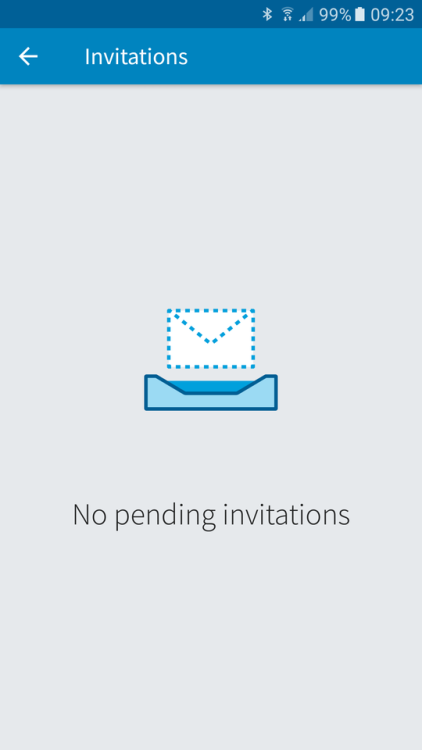

In [18]:
# Exercise 1; Part 1
from PIL import Image
solution = Image.open(os.path.join('images', 'solution.png'))
solution

In [19]:
# Part 2: Implement a function that computes the explicit solution for simple linear regression...
def simple_ERM_solution(x_samples, y_samples):
    y_mean = np.mean(y_samples)
    x_mean = np.mean(x_samples)
    x_center = x_samples - x_mean
    y_center = y_samples - y_mean
    w = np.sum(x_center*y_center)/np.sum(x_center*x_center)
    b = y_mean - w*x_mean
    return w, b

def plot_data_and_regressionline(x, y, w, b, x_label='', y_label='', title=''):
    predicted = w*x + b
    fig, ax = plt.subplots(figsize=(12,8))
    ax.plot(x, predicted, 'r', label=y_label)
    ax.scatter(x, y, label=x_label)
    ax.legend(loc=2)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)
    return fig, ax

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x115e9f3c8>)

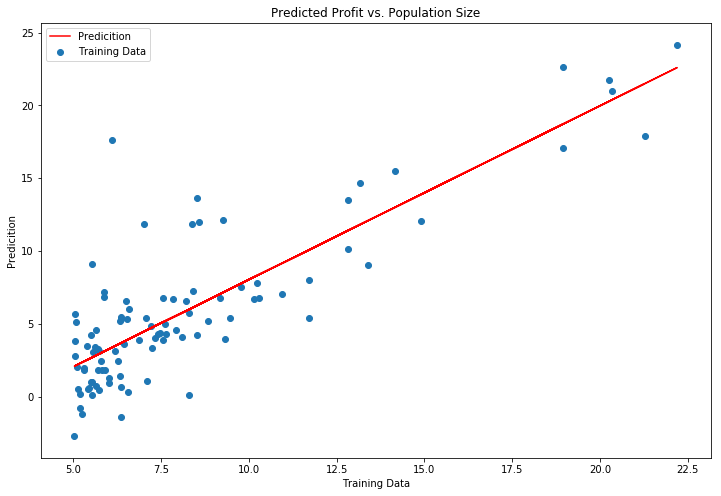

In [20]:
# ...and apply to the profit.txt data-set loaded previously.
x_pop = data.Population.values
y_prof = data.Profit.values
w, b = simple_ERM_solution(x_pop, y_prof)
plot_data_and_regressionline(x_pop, y_prof, w, b, 
                             'Training Data', 'Predicition', 'Predicted Profit vs. Population Size')

### Exercise 2: House Prices
* Load the **train_house_prices.csv** data set.<br>

* Write a function that receives the name of two columns (INPUT/OUTPUT) and returns the **ERM** solution for the simple linear regression model. Use to plot the linear relation between **LotArea** and **SalePrice**.<br>

One way of measuring how one feature affects another is by looking at correlation coefficients:

$$corr(X,Y) = \frac{cov(X,Y)}{\sigma_x \sigma_y} = \frac{\sum_{i=1}^n(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\left(\sum_{i=1}^n(x_i - \bar{x})^2\right)\left(\sum_{i=1}^n(y_i - \bar{y})^2\right)}}$$

The more $corr(X,Y)$ is closer to $1$ the more the variables are positive correlated, and when they are close to $-1$ we say they are negatively correlated. If the correlation is near zero, then the variables don't have a strong linear relation.<br>

* Implement a function that compute correlation between variables of the house-prices data-set. Find the variables that have the highest positive and negative (if there are) correlation with **SalePrice** and plot the linear regression result in this cases.<br>

* Use correlation coefficients to determine which variables are more relevant ($|corr(X,Y)|>\varepsilon$) to predict **SalePrice**.

* Fit a multivariable linear regression using the variables you have selected to predict **SalePrice**. In this case is prefered that you use gradient descent to find the solution of the problem. 

* Load the **test_house_prices.csv** data set and implement a gradient descent function that computes the error in the test set during training, plot this against the number of iterations.

* Analyse and comment the results you obtained.


In [21]:
# Bullet 1 - Load the train_house_prices.csv data set.
from sklearn.model_selection import train_test_split
df_houses = pd.read_csv(os.path.join(datapath, 'train_house_prices.csv'))
df_houses = df_houses.fillna(df_houses.mean())
df_train, df_test = train_test_split(df_houses, test_size=0.2)

### Bullet 2

In [22]:
def plot_regression_from_columns(input_col, output_col, dataframe=df_train):
    X = dataframe[input_col].values
    Y = dataframe[output_col].values
    w, b = simple_ERM_solution(X, Y)
    return plot_data_and_regressionline(X, Y, w, b, input_col, output_col,
                                        'Predicted {} vs. {}'.format(input_col, output_col))
    

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x116bd8080>)

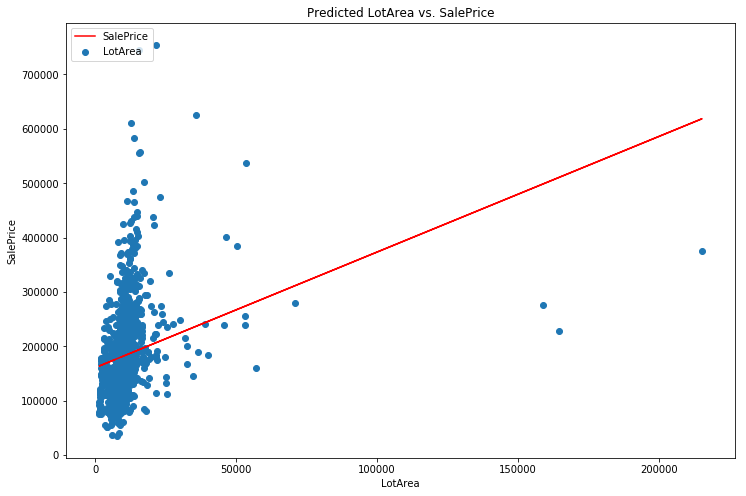

In [23]:
plot_regression_from_columns('LotArea', 'SalePrice')

### Bullet - 3

In [24]:

def correlation(X, Y):
    x_center = X - np.mean(X)
    y_center = Y - np.mean(Y)
    num = np.sum(x_center*y_center)
    den = np.sqrt(np.sum(x_center*x_center)*np.sum(y_center*y_center))
    return num/den

def correlation_between_columns(input_col, output_col, dataframe=df_train):
    X = dataframe[input_col].values
    Y = dataframe[output_col].values
    return correlation(X, Y)

def correlation_with_target(target, dataframe=df_train):
    # missing data treatment requires a more judiscious analysis 
    df_numeric_only = dataframe.select_dtypes(include=np.number).fillna(dataframe.mean())
    columns = list(df_numeric_only.columns)
    corr_list = []
    for col in columns:
        corr = correlation_between_columns(col, target, df_numeric_only)
        corr_list.append((corr, col))
        
    return sorted(corr_list, key = lambda tup: tup[0], reverse=True)

In [25]:
target = 'SalePrice'
corr_list = correlation_with_target(target)
# ordered list of the correlation coeficient between SalePrice and all variables 
corr_list

[(1.0, 'SalePrice'),
 (0.7911995200938815, 'OverallQual'),
 (0.7321755867405615, 'GrLivArea'),
 (0.6481963676398795, 'TotalBsmtSF'),
 (0.6419884011173038, 'GarageCars'),
 (0.6329425392784099, 'GarageArea'),
 (0.6243767289906844, '1stFlrSF'),
 (0.5624297158921316, 'FullBath'),
 (0.5398554181609365, 'TotRmsAbvGrd'),
 (0.519007237397563, 'YearBuilt'),
 (0.5088575187830817, 'YearRemodAdd'),
 (0.48424830640382904, 'MasVnrArea'),
 (0.4736189081329042, 'GarageYrBlt'),
 (0.46321289454341913, 'Fireplaces'),
 (0.40202720370443146, 'BsmtFinSF1'),
 (0.3505318715834, 'LotFrontage'),
 (0.3268848139152361, 'OpenPorchSF'),
 (0.32542855497414297, 'WoodDeckSF'),
 (0.3228806220180647, '2ndFlrSF'),
 (0.28595677432544203, 'HalfBath'),
 (0.27097574349527814, 'LotArea'),
 (0.22350330770064583, 'BsmtUnfSF'),
 (0.2163992887443217, 'BsmtFullBath'),
 (0.1632754284713069, 'BedroomAbvGr'),
 (0.10998834233804076, 'ScreenPorch'),
 (0.10447388198202968, 'PoolArea'),
 (0.047940070261623016, 'MoSold'),
 (0.042451540890

1 highest correlation with SalePrice
1 lowest correlation with SalePrice
2 highest correlation with SalePrice
2 lowest correlation with SalePrice
3 highest correlation with SalePrice
3 lowest correlation with SalePrice
4 highest correlation with SalePrice
4 lowest correlation with SalePrice


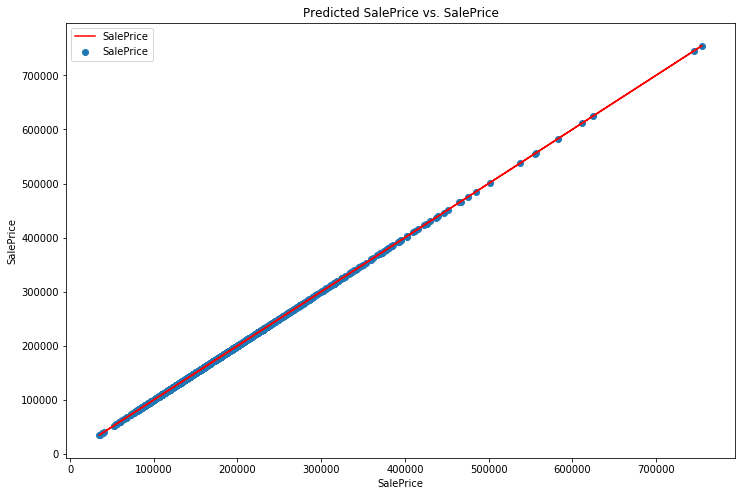

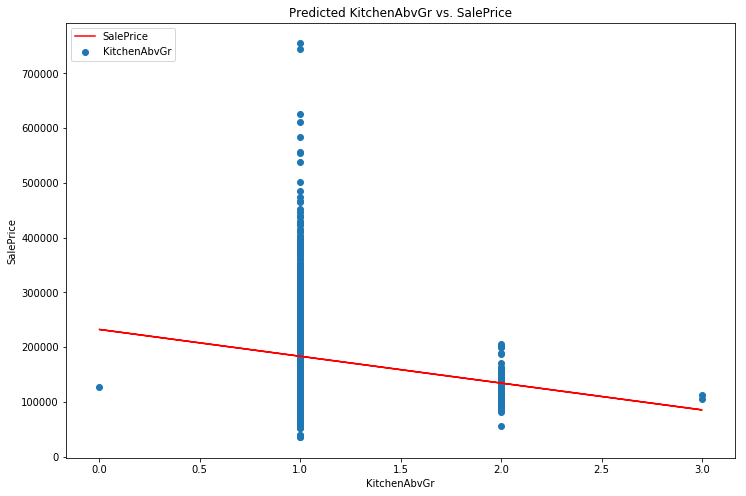

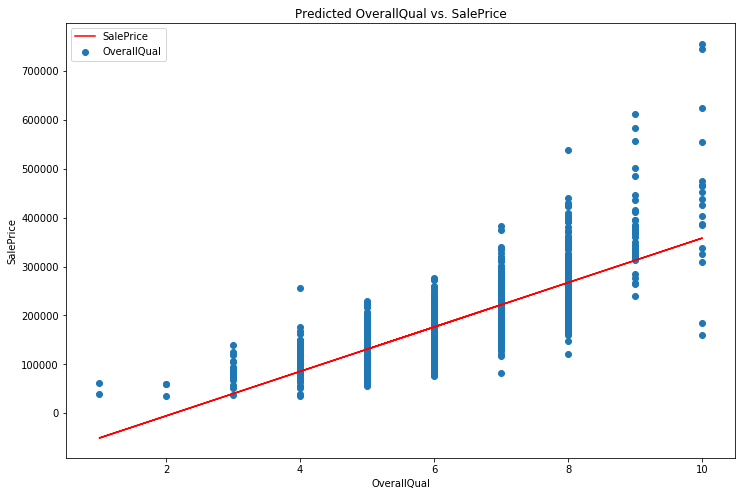

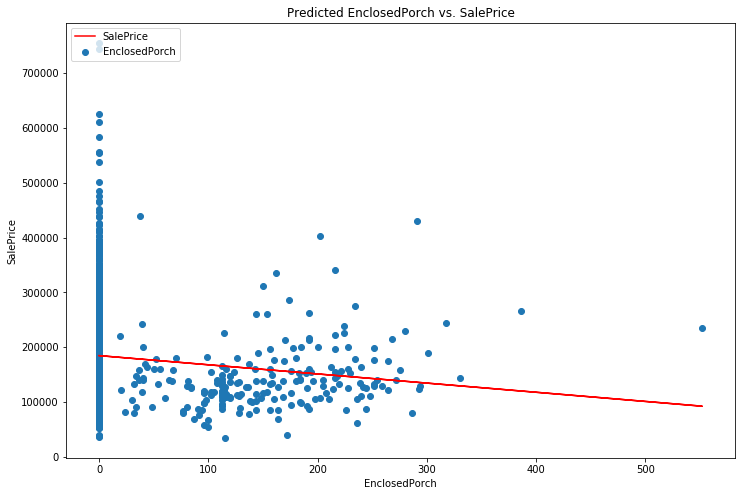

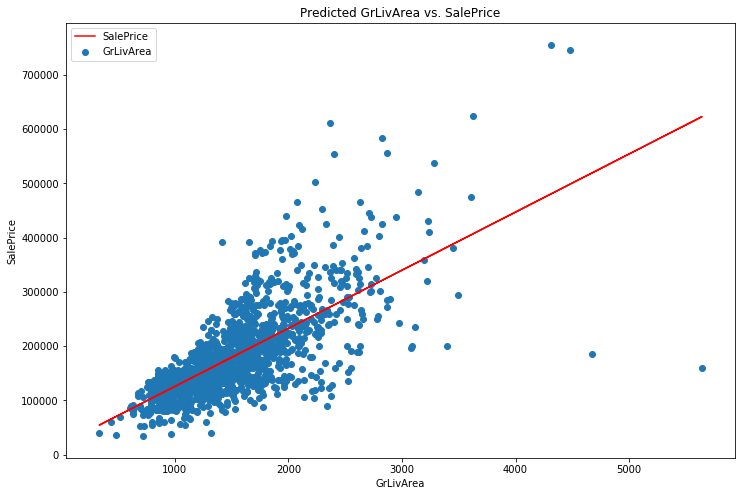

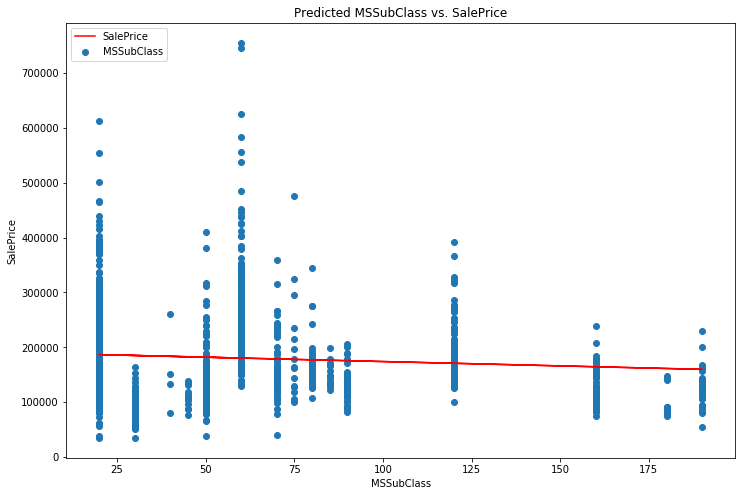

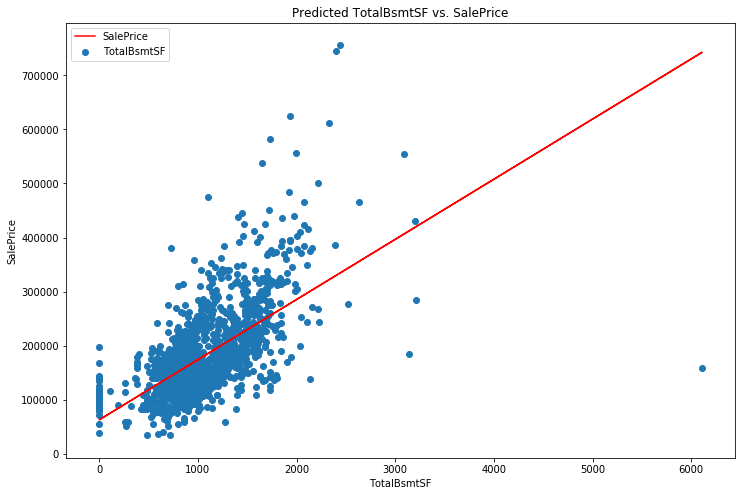

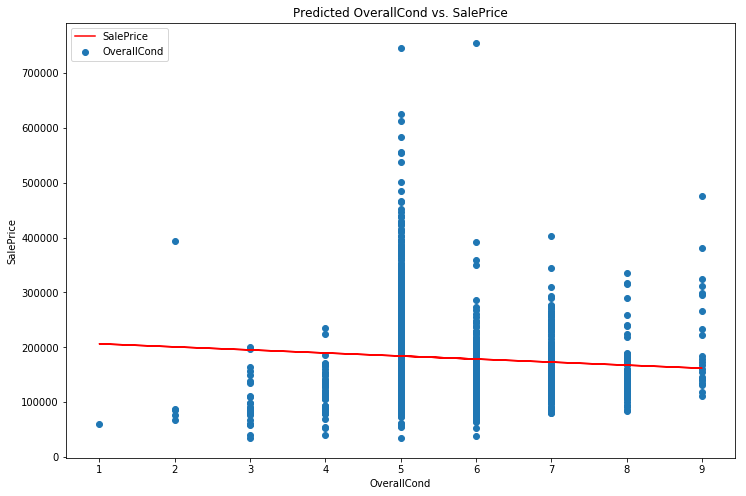

In [26]:
# Graphs showing the regression line in scatter plot choosing the 4 variables with 
# the highest and lowest (when negative) correlation coeficients
for i in range(1,5):
    print("{} highest correlation with {}".format(i, target))
    plot_regression_from_columns(corr_list[i-1][1], target, dataframe=df_houses)
    print("{} lowest correlation with {}".format(i, target))
    plot_regression_from_columns(corr_list[-i][1], target, dataframe=df_houses)

### Bullet 4

In [27]:
corr_threshold = 0.6
features = [t[1] for t in corr_list if abs(t[0]) > corr_threshold and t[1] != target]
features

['OverallQual',
 'GrLivArea',
 'TotalBsmtSF',
 'GarageCars',
 'GarageArea',
 '1stFlrSF']

### Bullet 5

In [28]:
df_features = df_train[features]
df_features.insert(0, 'Ones', 1)
X = np.matrix(df_features.values)
y = np.matrix(df_train[target].values)
theta = np.matrix(np.array([0]*np.shape(X)[1])) #initial value

In [29]:
theta

matrix([[0, 0, 0, 0, 0, 0, 0]])

In [42]:
# implement a gradient descent function that computes the error in the test set during training
def gradientDescent_cost_on_test(X, y, theta, alpha, iters, x_test, y_test):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost[i] = empRisk(x_test, y_test, theta)
        
    return theta, cost

def check_ground_thruth(X, y, alpha = 0.00000000001, iters=100, df=df_train, target='SalePrice'):
    theta = np.matrix(np.array([0]*np.shape(X)[1])) 
    g, cost_on_test = gradientDescent(X, y.T, theta, alpha, iters)
    plot_data_and_regressionline(df[target].values, df[target].values, g[0, 1], g[0, 0])

No handles with labels found to put in legend.


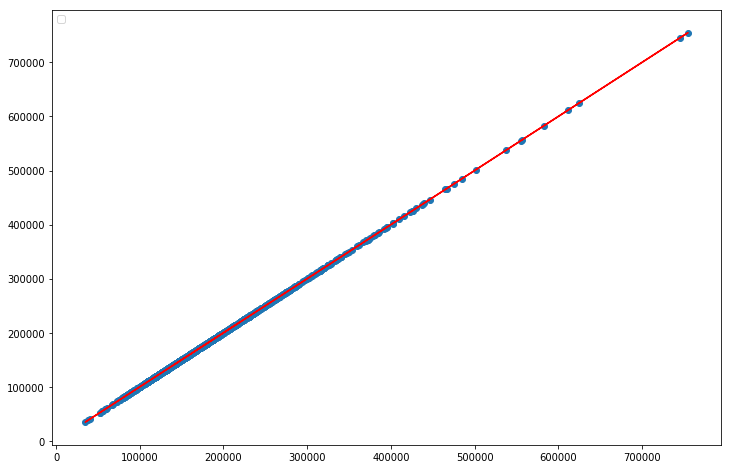

In [48]:
df_ground = df_train.copy()
df_ground.insert(0, 'Ones', 1)
check_ground_thruth(np.matrix(df_ground[['Ones','SalePrice']].values), np.matrix(df_train['SalePrice'].values))

In [57]:
df_features_test = df_test[features]
df_features_test.insert(0, 'Ones', 1)
x_test = np.matrix(df_features_test.values)
y_test = np.matrix(df_test[target].values)
alpha = 0.0000000005
iters = 1000

In [58]:
g, cost_on_test = gradientDescent_cost_on_test(X, y.T, theta, alpha, iters, x_test, y_test)
g

matrix([[3.01331410e-02, 2.12907529e-01, 5.34714999e+01, 3.70150010e+01,
         6.50860592e-02, 1.75030357e+01, 3.89731041e+01]])

In [59]:
print('Start cost:', cost_on_test[0], 'end cost:', cost_on_test[-1])

Start cost: 9902512419580.46 end cost: 2394807115090.9565


Text(0.5,1,'Error on Test dataset vs. Training Epoch')

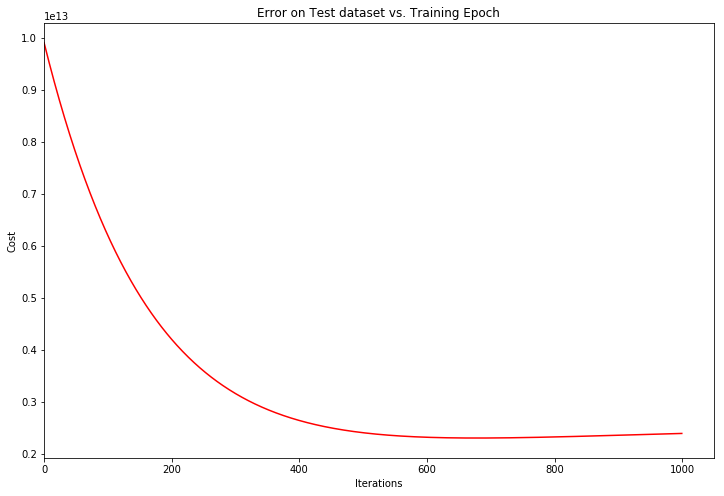

In [60]:
# Plot cost on test data computed during training
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost_on_test, 'r')
ax.set_xlim(xmin=0)
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error on Test dataset vs. Training Epoch')

## Analyse and comment the results you obtained.

O conjunto de dados apresentado sobre preços de casas possui mais de 80 variáveis, das quais 38 são de algum tipo numérico. Em particular, a variável "SalePrice", que representa o valor de venda dos imóveis amostrados, é a nossa variável objetivo, que tentamos prever a partir de um modelo de regressão linear.

Nesta tentativa inicial, não realizamos nenhum tratamento sofisticado dos dados selecionados para o modelo. Ao selecionar variáveis nos baseando apenas no coeficiente de correlação dos seus valores com o valor da nossa variável objetivo, deixamos de olhar para variáveis não numéricas que poderiam portar informações relevantes para a predição. Esta análise exigiria um esforço no sentido de descobrir variáveis que poderiam ser categorizadas de uma maneira numérica e ordenada. Além disso, mesmo variáveis que já são numéricas podem não nos apresentar os dados da maneira mais adequada para a nossa análise; por exemplo, talvez não seja o ideal analisar o ano específico em que um determinado imóvel foi construído, mas uma variável que apresente uma medida agregada dessa informação, por exemplo, colocando juntos os imóveis que foram construídos em uma mesma década, pode ser mais relevante. Este tipo de trabalho focado na engenharia de features a partir das variáveis brutas que foram fornecidas requer uma análise minuciosa e pode conribuir sobremaneira para um resultado mais apurado.

Das 37 possíveis variáveis explicativas que nos restaram, decidimos utilizar no modelo aquelas de maior correlação com a variável objetivo. Repare que esta correlação pode ser tanto positiva, quanto negativa, mostrando uma relação direta ou inversamente proporcional, respectivamente, entre as variáveis. Nesse caso, verificamos que as variáveis negativamente correlacionadas com o preço de venda dos imóveis, possuem coeficientes com baixo valor absoluto e, por isso, não entraram no modelo. O limiar de correlação escolhido foi de 0.6. durante o experimento, tentou-se ajustar um modelo selecionando variáveis com limiares superiores a valores entre 0.3 e 0.6. Não foi verificada diferença significativa entre esses casos e, por conta disso, optou-se por manter o limiar elevado e selecionar poucas variáveis para o modelo, reduzindo sua complexidade.

Um outro fator que nos leva à querer manter menos variáveis no modelo é o fato de não termos analisado a correlação cruzada entre as variáveis explicativas. Se incluirmos no modelo variáveis que são fortemente relacionadas entre si, corremos o risco de inserir um viés reforçando uma determinada informação.

O modelo empregado para a regressão linear com múltiplas variáveis utilizou o método de gradiente descendente para calcular e minimizar o erro durante o treinamento. Apesar de ser uma abordagem gulosa e iterativa, a otimização baseada no gradiente descendente gera bons resultados ao estimar modelos lineares devido à convexidade do problema.

Nós não realizamos nenhum tipo de "centralização"/normalização dos dados, o que é possível perceber pelas diferentes ordens de grandeza dos coeficientes calculados para o modelo linear (embora a discrepância não seja tão grande). Com dados normalizados, é mais seguro afirmar que a magnitude dos coeficientes expressa a relevância relativa entre eles dentro do modelo.

O erro calculado sobre o conjunto de teste durante as etapas de treinamento descresce rapidamente, porém após atingir um valor mínimo, cresce ligeiramente e mantém-se praticamente constante. A magnitude do erro pode ser considerada alta, mas isso também é uma consequência das grandes simplificações que realizamos nesse modelo, com a não implementação de vários passos já citados — um trabalho de engenharia de *features*.




### Exercise 3: House Values vs Crime Rate (EXTRA)
**(This exercise is not mandatory, but reccomended)**<br>
The data set is from Philadelphia, PA - USA and includes average house sales price in a number of neighborhoods. For each neighborhood we have attributes associated, which include their crime rate.

* Load the data set Philadelphia_Crime_Rate_noNA.csv
* Fit a linear regression model taking **CrimeRate** as feature to predict **HousePrice**, and analyse the results.

**Center City** is a region with an extremely high crime rate, yet the house prices are not too low.

* What is the effect of this region in the model? Remove **Center City** and redo the analysis. Compare the first and the new model.<br> (The Center City region comprises of elements with attribute MilesPhila$=0$)

* There are other outliers in the problem? Test for example removing high-value houses (>350000) and observe if this is a influential factor in the fitting.
